In [4]:
# import libraries
from numpy import *
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

In [5]:
# for upload dataset to google colab

uploaded = files.upload()

Saving data.csv to data (1).csv


In [6]:
# loading our dataset
points = genfromtxt('data.csv', delimiter=',')

In [7]:
# setting hyperparameters

learning_rate = 0.0001
# The learning_rate variable controls how large of a step we take downhill during each iteration
# if the learning rate is too low, our model will be too slow to converge
# whereas if it's too high, our model will never converge.

initial_b = 0
initial_m = 0
# y = mx + b

iterations_number = 5000
# you can change this number based on your system's computing power and dataset

In [8]:
# show plot function after a desired iteration
def showPlot(b, m, iterationNumber):
    width = max(points[:,0])
    height = max(points[:,1])
    plt.title('Points plot after {0} iteration'.format(iterationNumber))
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.scatter(points[:,0], points[:,1], color='black', s=15, label='Data')
    distance = 10
    start_point_x = min(points[:,0]) - distance
    end_point_x = max(points[:,0]) + distance
    plt.plot([start_point_x, end_point_x], [start_point_x*m+b, end_point_x*m+b], color='red', linewidth=3, alpha=0.7, label='Gradient Descent')
    plt.legend()
    plt.show()

In [9]:
# implementing SSE function
def computeErrorForLineGivenPoints(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        # points[i][1] means points[i].y
        # points[i][0] means points[i].x
        totalError += (points[i][1] - (m * points[i][0] + b)) ** 2
    return totalError / float(len(points))

In [10]:
# implementig gradient descent function
def gradientDescent(current_b, current_m, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        b_gradient += -(2/N) * (points[i][1] - ((current_m*points[i][0]) + current_b))
        m_gradient += -(2/N) * points[i][0] * (points[i][1] - ((current_m * points[i][0]) + current_b))
    new_b = current_b - (learning_rate * b_gradient)
    new_m = current_m - (learning_rate * m_gradient)
    return [new_b, new_m]

In [11]:
# implementig gradient descent runner
def gradientDescentIterator(points):
    b = initial_b
    m = initial_m
    for i in range(iterations_number):
      b, m = gradientDescent(b, m, array(points), learning_rate)
      # showPlot(b, m, i)
      # remove comment notation if you want to check the situation of each iteration
    return [b, m]

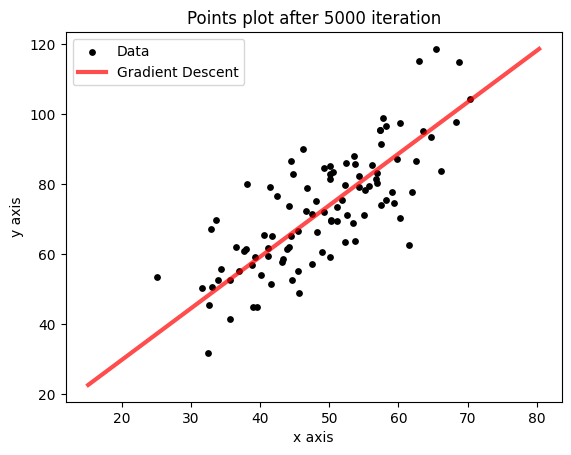

After 5000 iterations b = 0.3239436244645088, m = 1.4731250921538916, error = 112.47667596020761


In [12]:
# run
[b, m] = gradientDescentIterator(points)
showPlot(b, m, iterations_number)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(iterations_number, b, m, computeErrorForLineGivenPoints(b, m, points)))